In [131]:
# Importons les bibliothèques que nous allons utiliser
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Nous allons affiches les 5 premières lignes des données
Data = pd.read_csv('titanic-passengers.csv', sep=';')
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [132]:
# Let's have a general look of our data 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [133]:
# we will display the missing values per label
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data cleaning

In [135]:
#what are the modes of Cabin and Embarked?
Data[['Cabin','Embarked']].mode()

,Cabin,Embarked
0,B96 B98,S
1,C23 C25 C27,NaN
2,G6,NaN


In [136]:
Data['Age'].fillna(Data['Age'].mean(), inplace = True) # We will replace the mising values of Age with the mean

In [137]:
Data['Cabin'].fillna('G6', inplace = True) # # We will replace the mising values of Cabin with the mode

In [138]:
Data['Embarked'].fillna('S', inplace = True)# We will replace the mising values of  Embarked with the mode

In [139]:
Data.isnull().sum().sum() # To see how many missing values we have now

0

## Data visulization

C:\Users\hniki\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Histogram of different ages')]

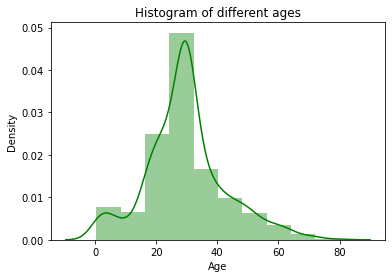

In [140]:
#Let's study the distribution of Age in the data with histogram seaborn
sns.distplot(Data['Age'], bins= 10, hist= True, kde= True, color= 'green').set(title='Histogram of different ages')

[Text(0.5, 1.0, 'Histogram of passengers classes')]

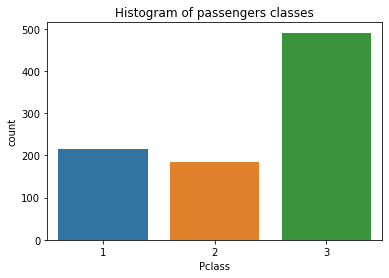

In [141]:
#Let's study the distribution of Passengers classes in the data with seaborn histogram

sns.countplot(x='Pclass',data=Data).set(title='Histogram of passengers classes')

<AxesSubplot:title={'center':'Pie plot of Sex'}, xlabel='Sex', ylabel='Sex'>

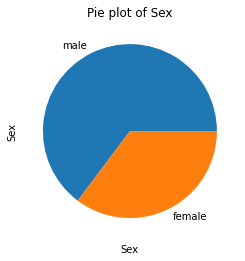

In [142]:
plt.title('Pie plot of Sex')
plt.xlabel('Sex')
#plt.ylabel('Sex value count')
vc= Data['Sex'].value_counts()
vc.plot.pie()

[Text(0.5, 1.0, 'Histogram of survived passengers')]

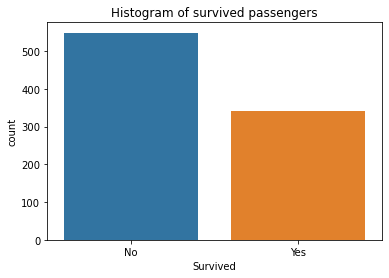

In [143]:
sns.countplot(x='Survived',data=Data).set(title='Histogram of survived passengers')

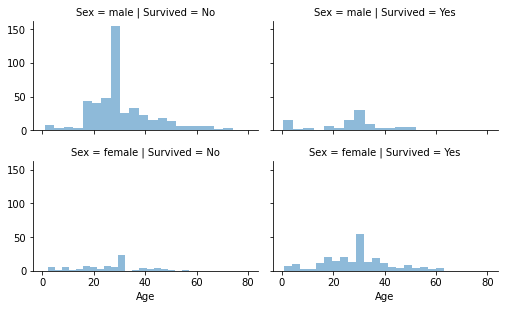

In [144]:
#Let's study the correlation between Age, Sex and Survived
grid = sns.FacetGrid(Data ,col='Survived', row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()


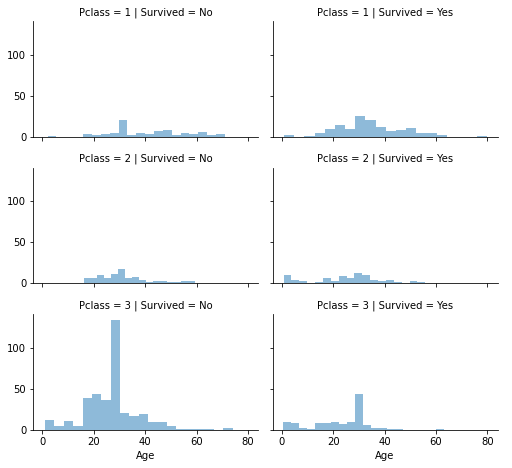

In [145]:
#Let's study the correlation between Age, Passenger class and Survived
grid = sns.FacetGrid(Data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

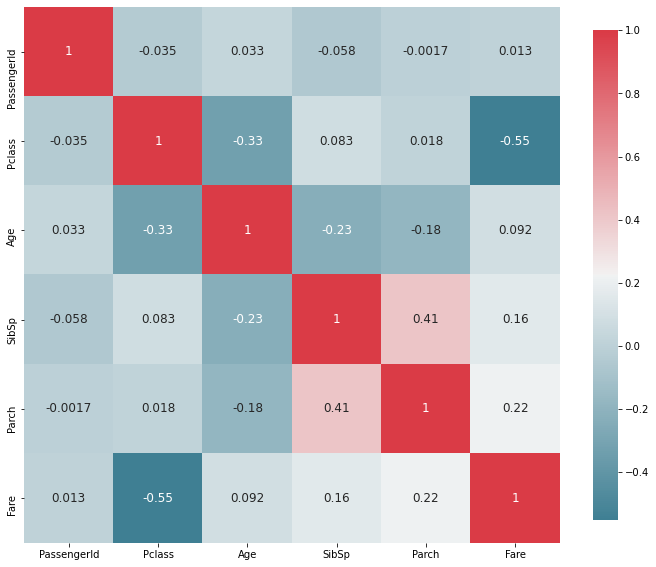

In [146]:
def plot_correlation_map( Data ):

    corr = Data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(Data)

In [ ]:
"""this is a correlation coefficient table.
--The neagtive values (-0,34;-0,077;and -0,055) are further from zero.

So the negative linear relation between our features(Survived,Age,Pclass,Age and Fare) is weak.

--The positive values(0,26 and 0,096) are also further from zero.
So the positive linear relation between our features is weak.
 We can conclude that there in a general way there is no correlation between the features we have chosen

"""

In [148]:
#We will use dictionnary to encode categorical feature Survived

update= {
    "Survived":{"Yes":1,'No':0}
}
Data.replace(update, inplace= True)

Data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [149]:
new_data= Data.copy()#Let's make a copy of our data in new_data before dropping Name 

Data.drop(['Name'], axis = 1, inplace= True)

new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [150]:
#extracting title from Names
def extract(x):
    #we will split the names in 2 parts
    
    return x.split(', ')[1].split('.')[0]
Data['Title']= new_data['Name'].apply(extract) #on applique la fonction extract sur new_data qui contient Name.

In [151]:
#Let's see the different titles in our data with their values
Data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Mme               1
Lady              1
the Countess      1
Sir               1
Jonkheer          1
Capt              1
Ms                1
Name: Title, dtype: int64

In [152]:
#By encoding Title we will have less titles so the vizualisation will be easier
Title_Dictionary= {
    'Title': {

                    "Capt": "Officer",

                    "Col":"Officer",

                    "Major":"Officer",

                      "Dr":  "Officer",

                    "Rev":"Officer",

                    "Jonkheer":"Royalty",

                    "Don":"Royalty",

                    "Sir" :"Royalty",

                   "Lady" :"Royalty",

                  "the Countess" : "Royalty",

                    "Dona":"Royalty",

                    "Mme":"Miss",

                    "Mlle":"Miss",

                    "Miss" :  "Miss",

                    "Ms": "Mrs",

                    "Mr" :"Mrs",

                    "Mrs" : "Mrs",

                    "Master" :"Master"

                    }
}

Data.replace(Title_Dictionary, inplace= True)

In [153]:
#new values have been succesfully replaced

Data['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

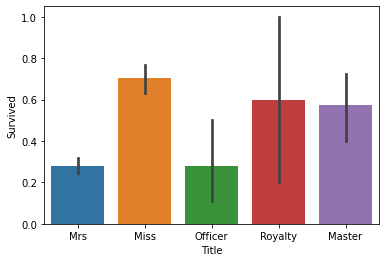

In [167]:
#Let's visualize the correlation between Title et Survived

sns.barplot(data=Data, x='Title', y='Survived')

In [176]:
#Let's create FamilySize feature with SibSp and Parch columns

Data['FamilySize'] = Data['SibSp'] + Data['Parch']
Data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
886,10,1,2,female,14.000000,1,0,237736,30.0708,G6,C,Mrs,1
887,61,0,3,male,22.000000,0,0,2669,7.2292,G6,C,Mrs,0
888,535,0,3,female,30.000000,0,0,315084,8.6625,G6,S,Miss,0
889,102,0,3,male,29.699118,0,0,349215,7.8958,G6,S,Mrs,0
890,428,1,2,female,19.000000,0,0,250655,26.0000,G6,S,Miss,0


In [181]:
#on remarque que comme dans le cas précedent FamilySize contient beaucoup de valeurs.Ce qui rend la visualisation difficile. 
#On va alors faire de l'encodage afin de rendre les donnés praticables
# Si FamilySize = 0 on l'accorde No et Pour FamilySize>0 on l'accord Yes.
state_family= {
    'FamilySize':{
        0:'No',
        1:'Yes',
        2:'Yes',
        3:'Yes',
        5:'Yes',
        4:'Yes',
        6:'Yes',
        10:'Yes',
        17:'Yes',
        7:'Yes'
    }
              
}
Data.replace(state_family, inplace= True)

In [182]:
Data['FamilySize'].value_counts()

No     537
Yes    354
Name: FamilySize, dtype: int64

## #Let's study the distribution of FamilySize and its correlation with other features

[Text(0.5, 1.0, 'Histogram of FamilySize')]

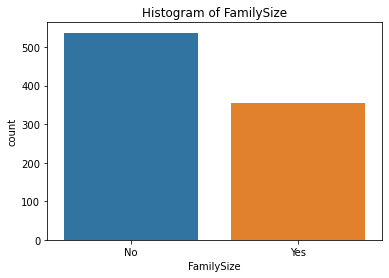

In [184]:
sns.countplot(x='FamilySize',data=Data).set(title='Histogram of FamilySize')#Let's study the distribution of FamilySize

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

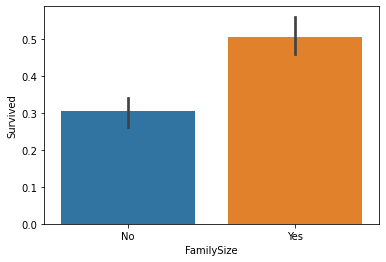

In [187]:
sns.barplot(data=Data, x='FamilySize', y='Survived')